In [49]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()

def showplt(X, y, feature_name):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    plt.figure(1, figsize=(8, 6))
    plt.clf()
    
    # Plot the training points
    scatter=plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel(feature_name[0])
    plt.ylabel(feature_name[1])
    
    plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2])
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.show()
    

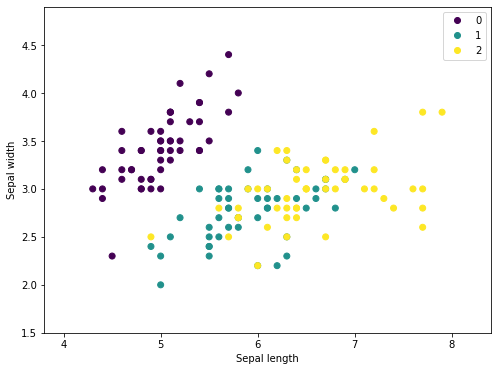

In [50]:
showplt(iris.data[:,:2],iris.target,("Sepal length", "Sepal width"))

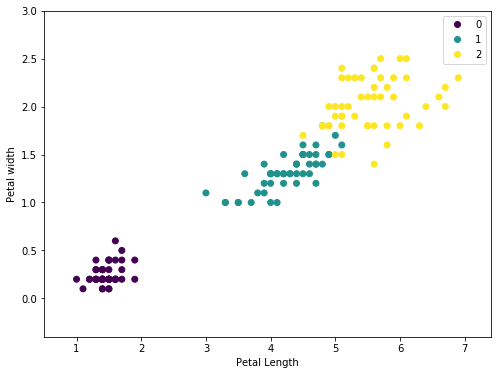

In [51]:
showplt(iris.data[:,2:],iris.target,("Petal Length", "Petal width"))


In [52]:
import numpy as np
def filter_datasets1():
    selects = ~(iris.target==2)
    return iris.data[selects], iris.target[selects]

X, y = filter_datasets1()

def split_datasets1(X, y, train_size=0.7):
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    for yy in set(y):
        selects = y==yy
        X_s = X[selects]
        y_s = y[selects]
        split_choices = np.zeros(len(y_s), dtype=bool)
        split_choices[np.random.choice(len(y_s), int(train_size*len(X_s)), replace=False)]=True
        X_train.append(X_s[split_choices])
        X_test.append(X_s[~split_choices])
        y_train.append(y_s[split_choices])
        y_test.append(y_s[~split_choices])
    X_train = np.concatenate(X_train, axis=0)
    y_train = np.concatenate(y_train)
    X_test = np.concatenate(X_test, axis=0)
    y_test = np.concatenate(y_test)
    return X_train,y_train,X_test, y_test

X_train,y_train,X_test, y_test = split_datasets1(X,y)

class MedClassifier():
    def __init__(self):
        self.class_protos = {}
        
    def train(self, X_data, y_data):
        self.class_protos = {}
        for yy in set(y_data):
            selects = y_data==yy
            X_s = X_data[selects]
            self.class_protos[yy]=np.mean(X_s, axis=0)

    def predict(self, x):
        distances = {}
        for y, x_mean in self.class_protos.items():
            distances[y] = np.linalg.norm(x_mean-x, ord=2)
        return min(distances, key=distances.get)

classifier1 = MedClassifier()
class_prototypes = classifier1.train(X_train, y_train)
result = [classifier1.predict(x) for x in X_test]

def compute_metrics(y_predict, y_gt):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    metrics = {}
    assert len(y_predict)==len(y_gt)
    for i in range(len(y_predict)):
        if y_predict[i]==1 and y_gt[i]==1:
            tp+=1
        if y_predict[i]==1 and y_gt[i]==0:
            fp+=1
        if y_predict[i]==0 and y_gt[i]==1:
            fn+=1
        if y_predict[i]==0 and y_gt[i]==0:
            tn+=1
    metrics["accuracy"]=(tp+tn)/len(y_predict)
    metrics["precision"]=tp/(tp+fp)
    metrics["recall"]=tp/(tp+fn)
    metrics["specificity"]=tn/(tn+fp)
    metrics["f1"]=(2*metrics["precision"]*metrics["recall"])/(metrics["precision"]+metrics["recall"])
    return metrics

metrics1 = compute_metrics(result, y_test)
print(metrics1)

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'specificity': 1.0, 'f1': 1.0}


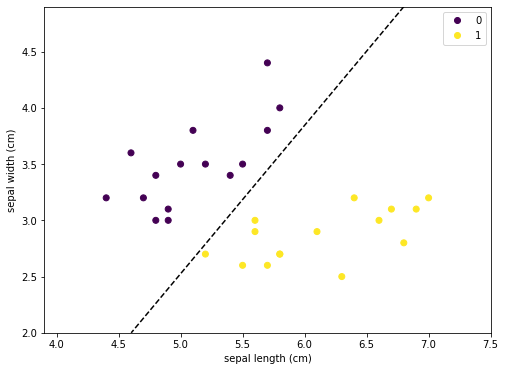

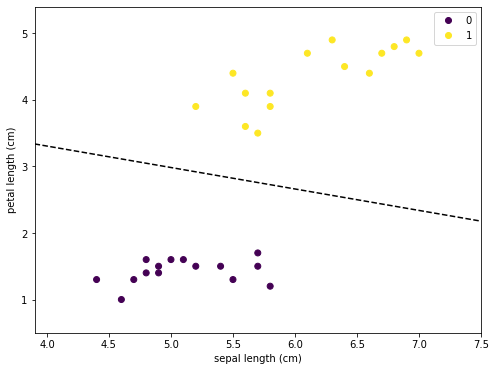

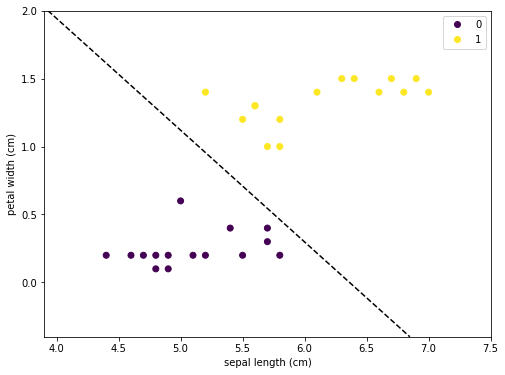

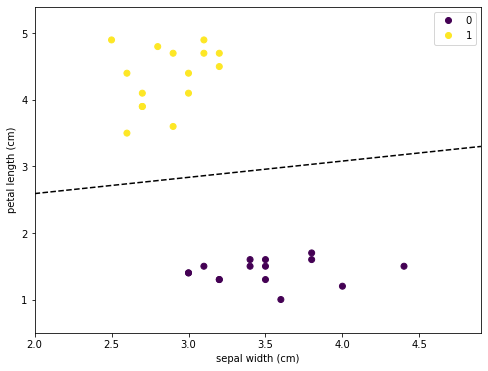

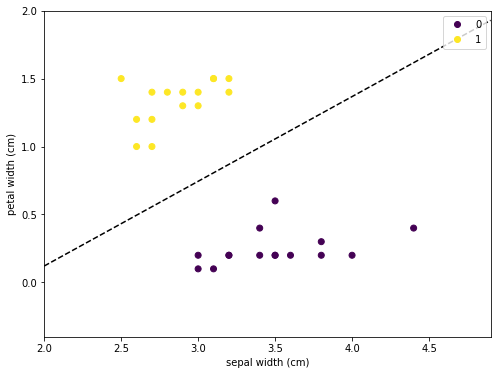

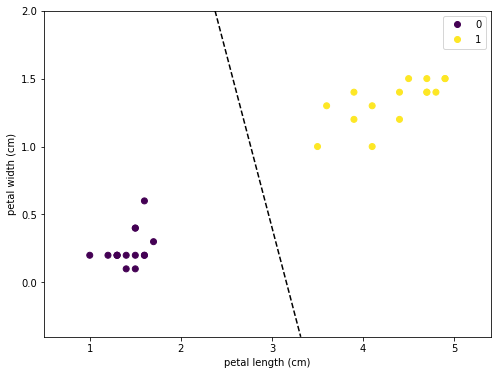

In [53]:
def showplt1(X, y, feature_name, feature_index, class_protos=None):
    X = X[:, feature_index]
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    plt.figure(1, figsize=(8, 6))
    plt.clf()
    
    # Plot the training points
    scatter=plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel(feature_name[feature_index[0]])
    plt.ylabel(feature_name[feature_index[1]])
    if class_protos is not None:
        xlist = np.linspace(x_min, x_max, 100) # Create 1-D arrays for x,y dimensions
        ylist = np.linspace(y_min, y_max, 100) 
        m1 = class_protos[0][feature_index]
        m2 = class_protos[1][feature_index]
        XX, YY = np.meshgrid(xlist, ylist)
        F=XX*2*(m2[0]-m1[0])+m1[0]**2-m2[0]**2-(YY*2*(m1[1]-m2[1])+m2[1]**2-m1[1]**2)
        plt.contour(XX, YY, F, [0], colors = 'k', linestyles = '--')
    plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2])
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.show()
    
for i in range(len(iris.feature_names)):
    for j in range(i+1,len(iris.feature_names)):
        showplt1(X_test, y_test, iris.feature_names, [i,j], classifier1.class_protos)
        
        

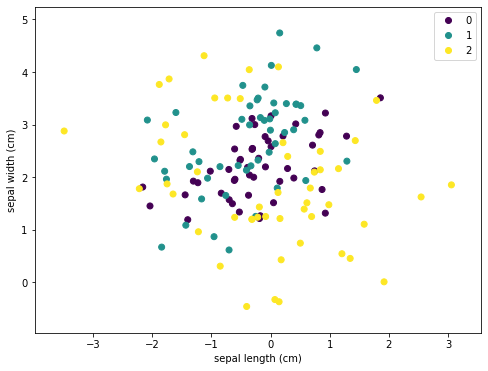

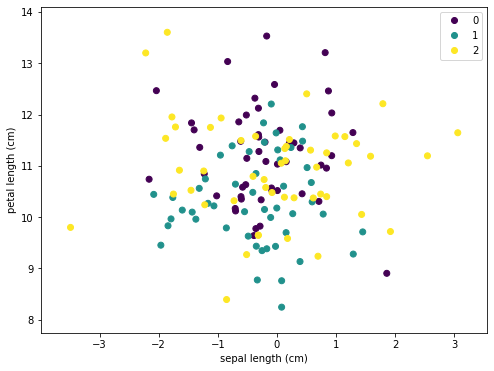

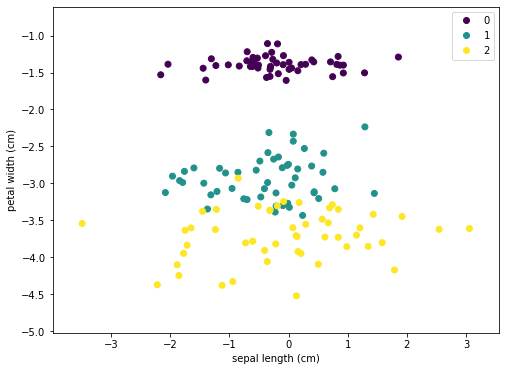

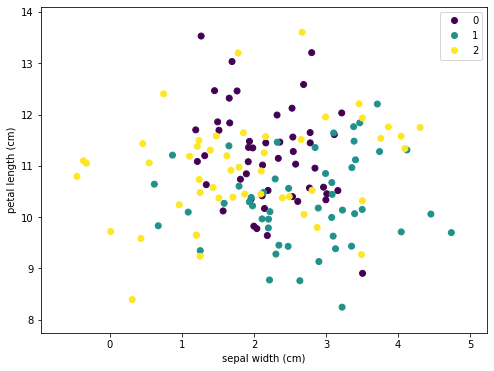

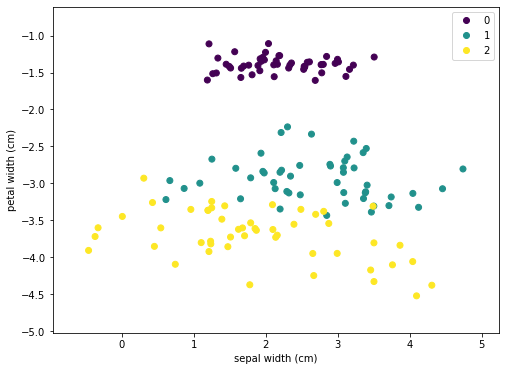

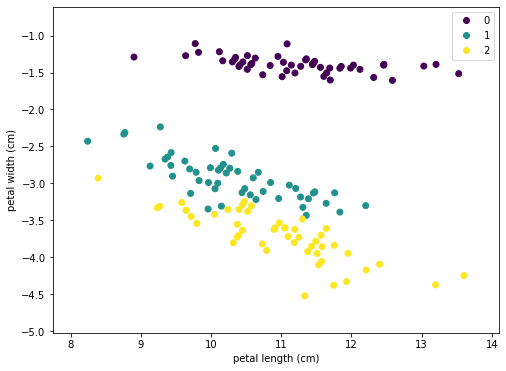

In [54]:
from scipy.cluster.vq import whiten
from scipy.linalg import fractional_matrix_power
from sklearn.preprocessing import normalize
X_whiten = whiten(iris.data) # WTF?

def my_whiten(data):
    cov = np.cov(data,rowvar=False)
    d, V = np.linalg.eigh(cov)
    W = np.dot(fractional_matrix_power(np.diag(d), -0.5), V.T)
    X_w = np.dot(W, data.T).T
    return X_w
X_my_whiten = my_whiten(iris.data)
for i in range(len(iris.feature_names)):
    for j in range(i+1,len(iris.feature_names)):
        showplt1(X_my_whiten, iris.target, iris.feature_names, [i,j])
        

{'accuracy': 0.9333333333333333, 'precision': 0.9333333333333333, 'recall': 0.9333333333333333, 'specificity': 0.9333333333333333, 'f1': 0.9333333333333333}


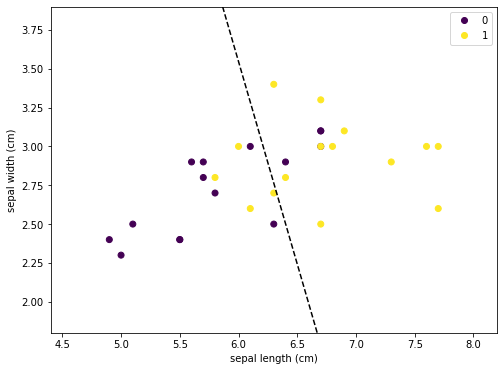

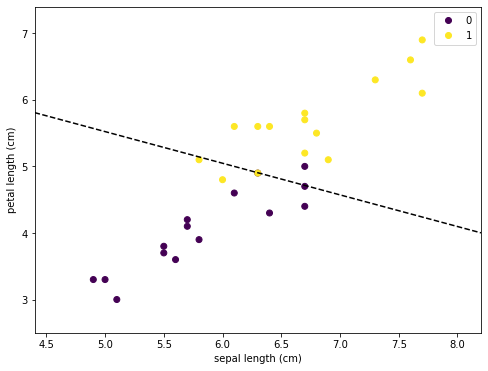

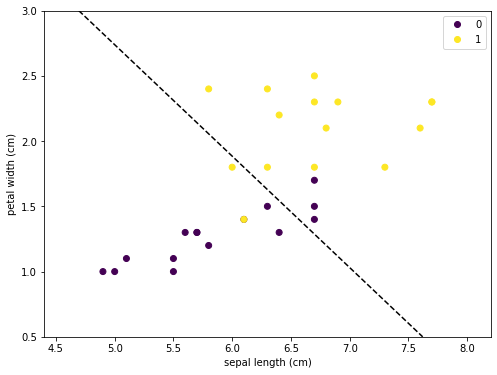

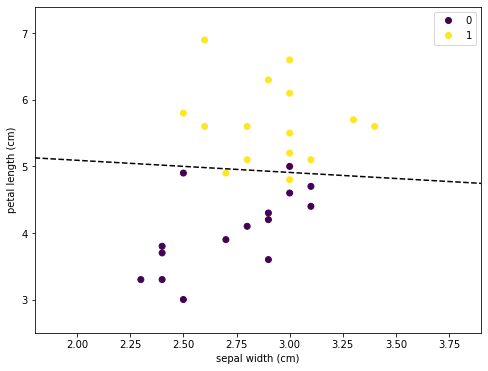

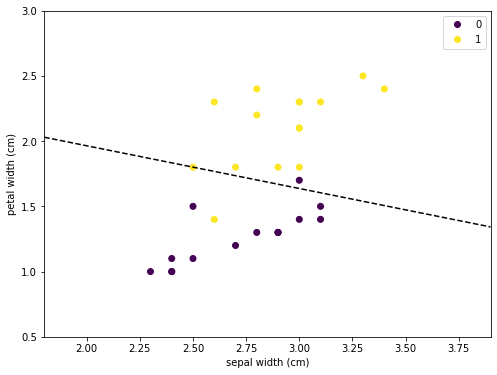

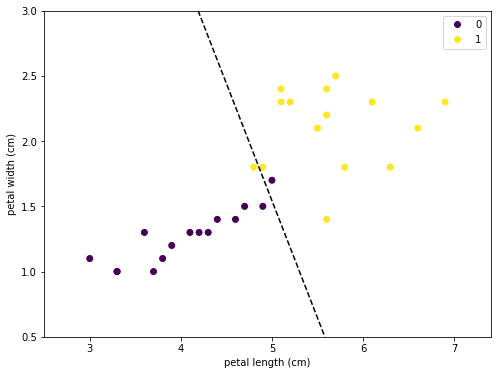

In [55]:
def filter_datasets2():
    selects = ~(iris.target==0)
    return iris.data[selects], iris.target[selects]
X, y = filter_datasets2()
y[y==1]=0
y[y==2]=1

X_train, y_train, X_test, y_test = split_datasets1(X, y)

classifier2 = MedClassifier()
classifier2.train(X_train, y_train)
result = [classifier2.predict(x) for x in X_test]
metrics2 = compute_metrics(result, y_test)
print(metrics2)
for i in range(len(iris.feature_names)):
    for j in range(i+1,len(iris.feature_names)):
        showplt1(X_test, y_test, iris.feature_names, [i,j], classifier2.class_protos)

In [56]:
from scipy.stats import multivariate_normal

def k_fold_split(X_data,y_data,k, n):
    assert n<k
    
    X_train=[]
    y_train=[]
    X_test=[]
    y_test=[]
    for c in set(y_data):
        selects = y_data==c
        X_s = X_data[selects]
        y_s = y_data[selects]
        per_fold = int(y_s.shape[0]/k)
        for i in range(k):
            selects = np.arange(i*per_fold,(i+1)*per_fold)
            X_s1 = X_s[selects]
            y_s1 = y_s[selects]
            if i==n:
                X_test.append(X_s1)
                y_test.append(y_s1)
            else:
                X_train.append(X_s1)
                y_train.append(y_s1)
    X_train = np.concatenate(X_train, axis=0)
    y_train = np.concatenate(y_train)
    X_test = np.concatenate(X_test, axis=0)
    y_test = np.concatenate(y_test)
    return X_train, y_train, X_test, y_test


class BayesianParameter():
    def __init__(self, prior, means, cov):
        self.prior = prior
        self.means = means
        self.cov = cov
            
class BayesianClassifier():
    # Optimal Bayesian Classifier, parameters estimated by maximum likelihood
    def __init__(self):
        self.parameters = {}
    
    def train(self, X_data, y_data):
        for yy in set(y_data):
            selects = y_data==yy
            X_s = X_data[selects]
            prior = X_s.shape[0]/X_data.shape[0]
            means = np.mean(X_s, axis=0)
            cov = np.cov(X_s, rowvar=False)
            self.parameters[yy]=BayesianParameter(prior, means, cov)
    
    def predict(self,x):
        scores = {}
        for yy, par in self.parameters.items():
            scores[yy]=multivariate_normal.pdf(x, mean=par.means, cov=par.cov)
        return max(scores, key=scores.get)
    
def compute_accuracy(y_predict, y_gt):
    assert len(y_predict)==len(y_gt)
    y_predict = np.array(y_predict)
    return np.sum(y_predict==y_gt)/y_predict.shape[0]

In [57]:
accuracy = .0
for i in range(5):
    X_train, y_train, X_test, y_test = k_fold_split(iris.data, iris.target, 5, i)
    bc = BayesianClassifier()
    bc.train(X_train, y_train)
    result = [bc.predict(x) for x in X_test]
    accuracy += compute_accuracy(result, y_test)
print(accuracy/5)

0.9800000000000001


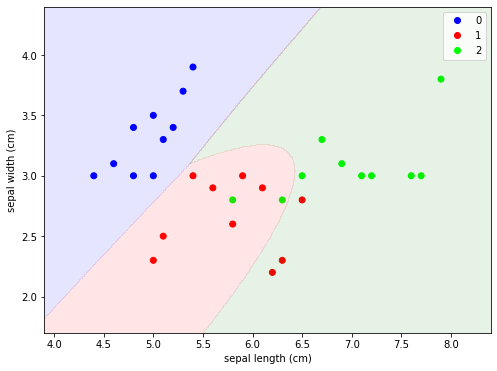

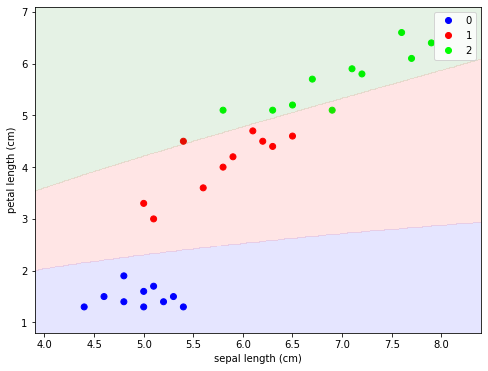

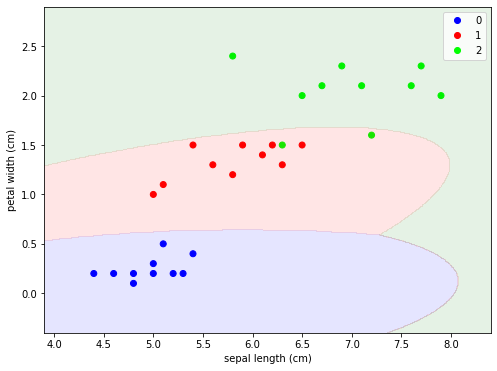

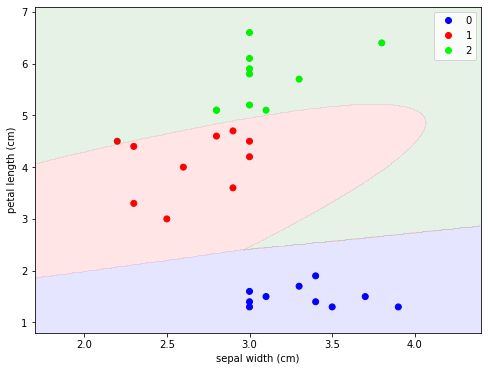

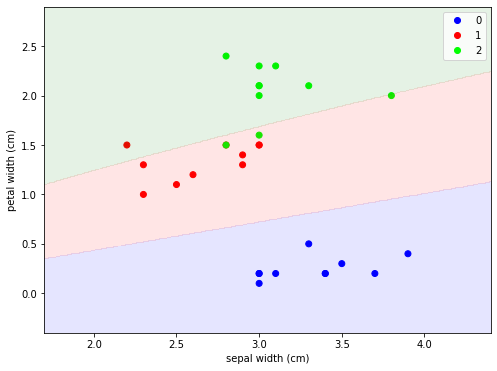

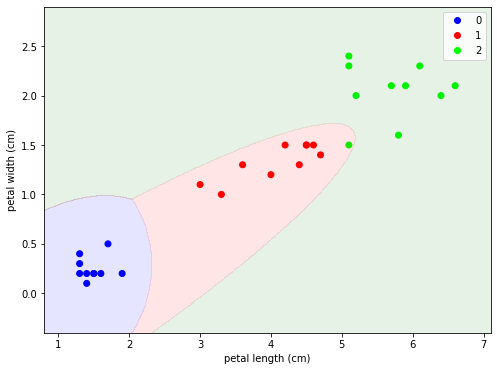

In [58]:
def showplt2(X, y, feature_name, feature_index, X_train, y_train):
    X = X[:, feature_index]
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    plt.figure(1, figsize=(8, 6))
    plt.clf()
    # Plot the training points
    scatter=plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg")
    plt.xlabel(feature_name[feature_index[0]])
    plt.ylabel(feature_name[feature_index[1]])
    xlist = np.linspace(x_min, x_max, 500) # Create 1-D arrays for x,y dimensions
    ylist = np.linspace(y_min, y_max, 500) 
    XX, YY = np.meshgrid(xlist, ylist)
    bc = BayesianClassifier()
    bc.train(X_train[:,feature_index], y_train)
    xys = [np.array([xx,yy]).reshape(1,-1) for xx, yy in zip(np.ravel(XX), np.ravel(YY))]
    zz = np.array([bc.predict(x) for x in xys])
    Z = zz.reshape(XX.shape)
    plt.contourf(XX, YY, Z, 2,  alpha=.1, colors = ('blue','red','green'))
    plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2])
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.show()
    
X_train, y_train, X_test, y_test = split_datasets1(iris.data, iris.target, 0.8)
for i in range(len(iris.feature_names)):
    for j in range(i+1,len(iris.feature_names)):
        showplt2(X_test, y_test, iris.feature_names, [i,j], X_train, y_train)